In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv('advertising.csv', dtype= {'TV': float, 'Radio': float, 'Newspaper': float, 'Sales': float})
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [8]:
def load_data_from_file(file_name = "advertising.csv"):
    data = np.genfromtxt(file_name, dtype=None, delimiter=',', skip_header=1)
    X = data[:, :3]
    y = data[:,3]
    n = X.shape[0]
    X = np.concatenate((np.ones((n,1)),X), axis=1)
    return X,y

In [12]:
X,y = load_data_from_file()
print(X[:5,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [13]:
print(y.shape)

(200,)


In [18]:
def generate_random_value(bound = 10):
    return (random.random()-0.5)*bound

def create_individual(n=4, bound=10):
    individual = [generate_random_value(bound) for i in range(n)]
    
    return individual

In [20]:
individual = create_individual()
individual

[-3.628067366148582,
 -2.7418319983257735,
 -3.3516396430974673,
 2.0908034321595705]

In [22]:
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = X.dot(theta)
    loss = np.multiply((y_hat-y), (y_hat-y)).mean()
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness = 1/(loss+1)
    return fitness

In [23]:
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


In [24]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    n = len(individual1)
    for i in range(n):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]

    return individual1_new, individual2_new


In [25]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


In [26]:
def mutate(individual, mutation_rate = 0.05):
    individual_new = individual.copy()
    n = len(individual)
    for i in range(n):
        if random.random() < mutation_rate:
            individual[i] = generate_random_value()

    return individual_new

In [32]:
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


In [33]:
def initialize_population(m):
    population = [create_individual() for i in range(m)]
    return population

In [35]:
population = initialize_population(100)
print(len(population))

100


In [37]:
def selection(sorted_old_population , m = 100):
    index1 = random.randint(0, m-1)
    index2 = index1
    while index2 == index1:
        index2 = random.randint(0, m-1)

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]
    
    return individual_s

In [38]:
population = initialize_population(m=100)
individual_s = selection(population, m = 100)
print(individual_s)

[-1.5900318294632731, -1.9308126372369772, -3.618830994246538, -0.6158442075351123]


In [41]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key = compute_fitness)

    if gen % 1==0:
        print("Best loss:", compute_loss(sorted_population[m-1]), "with chromsome: ", sorted_population[m-1])

    new_population = []
    while len(new_population) < m-elitism:
        individual_s1 = selection(sorted_population, m)
        individual_s2 = selection(sorted_population, m)
        individual_t1, individual_t2 = crossover(individual_s1, individual_s2)

        individual_m1 = mutate(individual_t1)
        individual_m2 = mutate(individual_t2) 

        new_population.append(individual_m1)
        new_population.append(individual_m2)

    for i in sorted_population[m-elitism:]:
        new_population.append(i.copy())
    
    return new_population, compute_loss(sorted_population[m-1])

In [42]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)

Best loss: 123415.051528805 with chromsome:  [3.44, 2.57, -0.79, -2.41]


In [49]:
def run_ga():
    n_generations = 100
    m = 600
    X, y = load_data_from_file()
    population = initialize_population(m)
    losses_list = []
    for i in range(n_generations):
        population, loss = create_new_population(population, 2, i)
        losses_list.append(loss)
    return losses_list

In [50]:
losses_list = run_ga()

Best loss: 438.0775666596538 with chromsome:  [1.3877359089556718, 0.1194901553448724, -0.43444572850260044, 0.6738227141682196]
Best loss: 438.0775666596538 with chromsome:  [1.3877359089556718, 0.1194901553448724, -0.43444572850260044, 0.6738227141682196]
Best loss: 438.0775666596538 with chromsome:  [1.3877359089556718, 0.1194901553448724, -0.43444572850260044, 0.6738227141682196]
Best loss: 438.0775666596538 with chromsome:  [1.3877359089556718, 0.1194901553448724, -0.43444572850260044, 0.6738227141682196]
Best loss: 438.0775666596538 with chromsome:  [1.3877359089556718, 0.1194901553448724, -0.43444572850260044, 0.6738227141682196]
Best loss: 162.7553233352153 with chromsome:  [-3.9952344448073784, -0.03435390095642421, 0.5461443227033225, 0.25960012796844456]
Best loss: 162.7553233352153 with chromsome:  [-3.9952344448073784, -0.03435390095642421, 0.5461443227033225, 0.25960012796844456]
Best loss: 65.46770378473953 with chromsome:  [4.6927096189907775, 0.018811199221000496, -0.2

In [51]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):
    plt.plot(losses_list, c='green')
    plt.xlabel('Generations')
    plt.ylabel('losses')
    plt.show()

Best loss: 650.8992865076408 with chromsome:  [1.1266359113636693, 0.2873606562416975, -0.9277031384223688, -0.17511999794454058]
Best loss: 650.8992865076408 with chromsome:  [1.1266359113636693, 0.2873606562416975, -0.9277031384223688, -0.17511999794454058]
Best loss: 650.8992865076408 with chromsome:  [1.1266359113636693, 0.2873606562416975, -0.9277031384223688, -0.17511999794454058]
Best loss: 87.84245730544245 with chromsome:  [1.6239787120430305, 0.13063953237101855, 0.16199249857052123, -0.10546010594254973]
Best loss: 87.84245730544245 with chromsome:  [1.6239787120430305, 0.13063953237101855, 0.16199249857052123, -0.10546010594254973]
Best loss: 48.82667083061094 with chromsome:  [-4.823692264655566, 0.13063953237101855, 0.16199249857052123, -0.10546010594254973]
Best loss: 48.82667083061094 with chromsome:  [-4.823692264655566, 0.13063953237101855, 0.16199249857052123, -0.10546010594254973]
Best loss: 48.82667083061094 with chromsome:  [-4.823692264655566, 0.13063953237101855

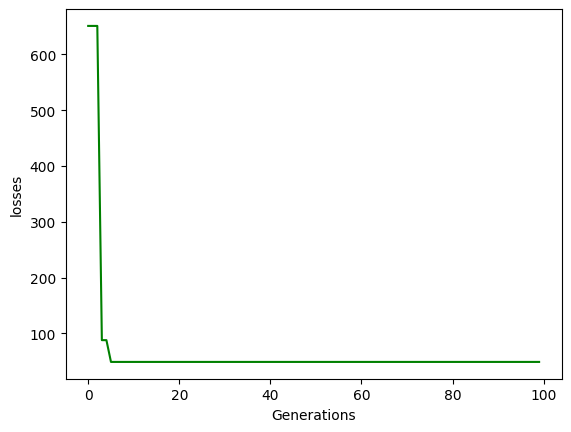

In [52]:
losses_list = run_ga()
visualize_loss(losses_list)

In [55]:
def visualize_predict_gt():
    sorted_population = sorted(population, key=compute_fitness)
    theta = np.array(sorted_population[-1])
    estimated_prices = []
    for feature in X:
        estimated_price = sum(c*x for x,c in zip(feature, theta))
        estimated_prices.append(estimated_price)
    
    fig, ax = plt.subplots(figsize=(10,6))
    plt.xlabel('Samples')
    plt.ylabel('Price')
    plt.plot(sales_Y, c='green', label='Real Prices')
    plt.plot(estimated_prices, c='blue', label='Estimated Prices')
    plt.legend()
    plt.show()


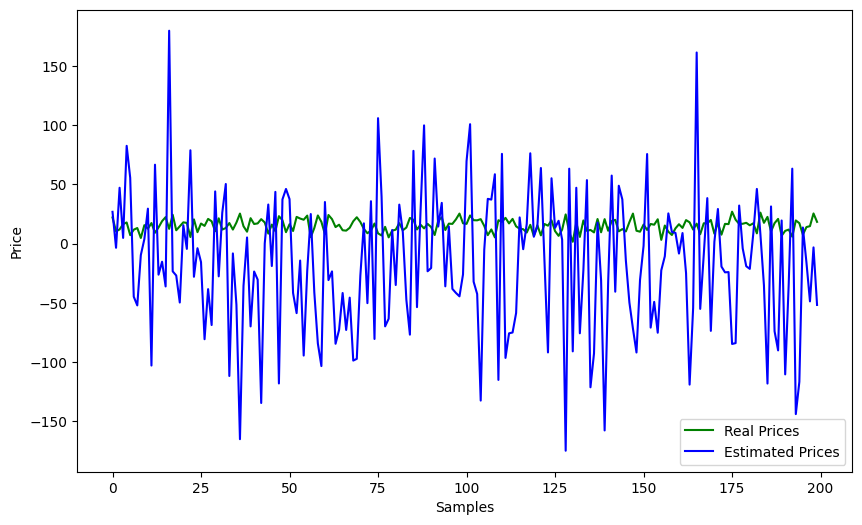

In [56]:
visualize_predict_gt()